In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # some imports to set up plotting
import seaborn as sns # pip install seaborn
import random
import warnings
warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'
distance

Distance
30       1
1498     1
1520     1
1529     1
1530     1
        ..
761     87
528     88
612     89
403     90
337     91
Name: dep_delayed_15min, Length: 1202, dtype: int64


- доля всех задержек ко всем вылетам сделано
- найти зависимость количества задержек от длины пути, который предстоит пролететь самолету сделано
- топ 5 направлений, для которых чаще всего происходят задержки
- в какие времена года чаще всего происходят задержки рейсов
- найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы
- найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
- найти необычную зависимость количества задержек от имеющихся данных


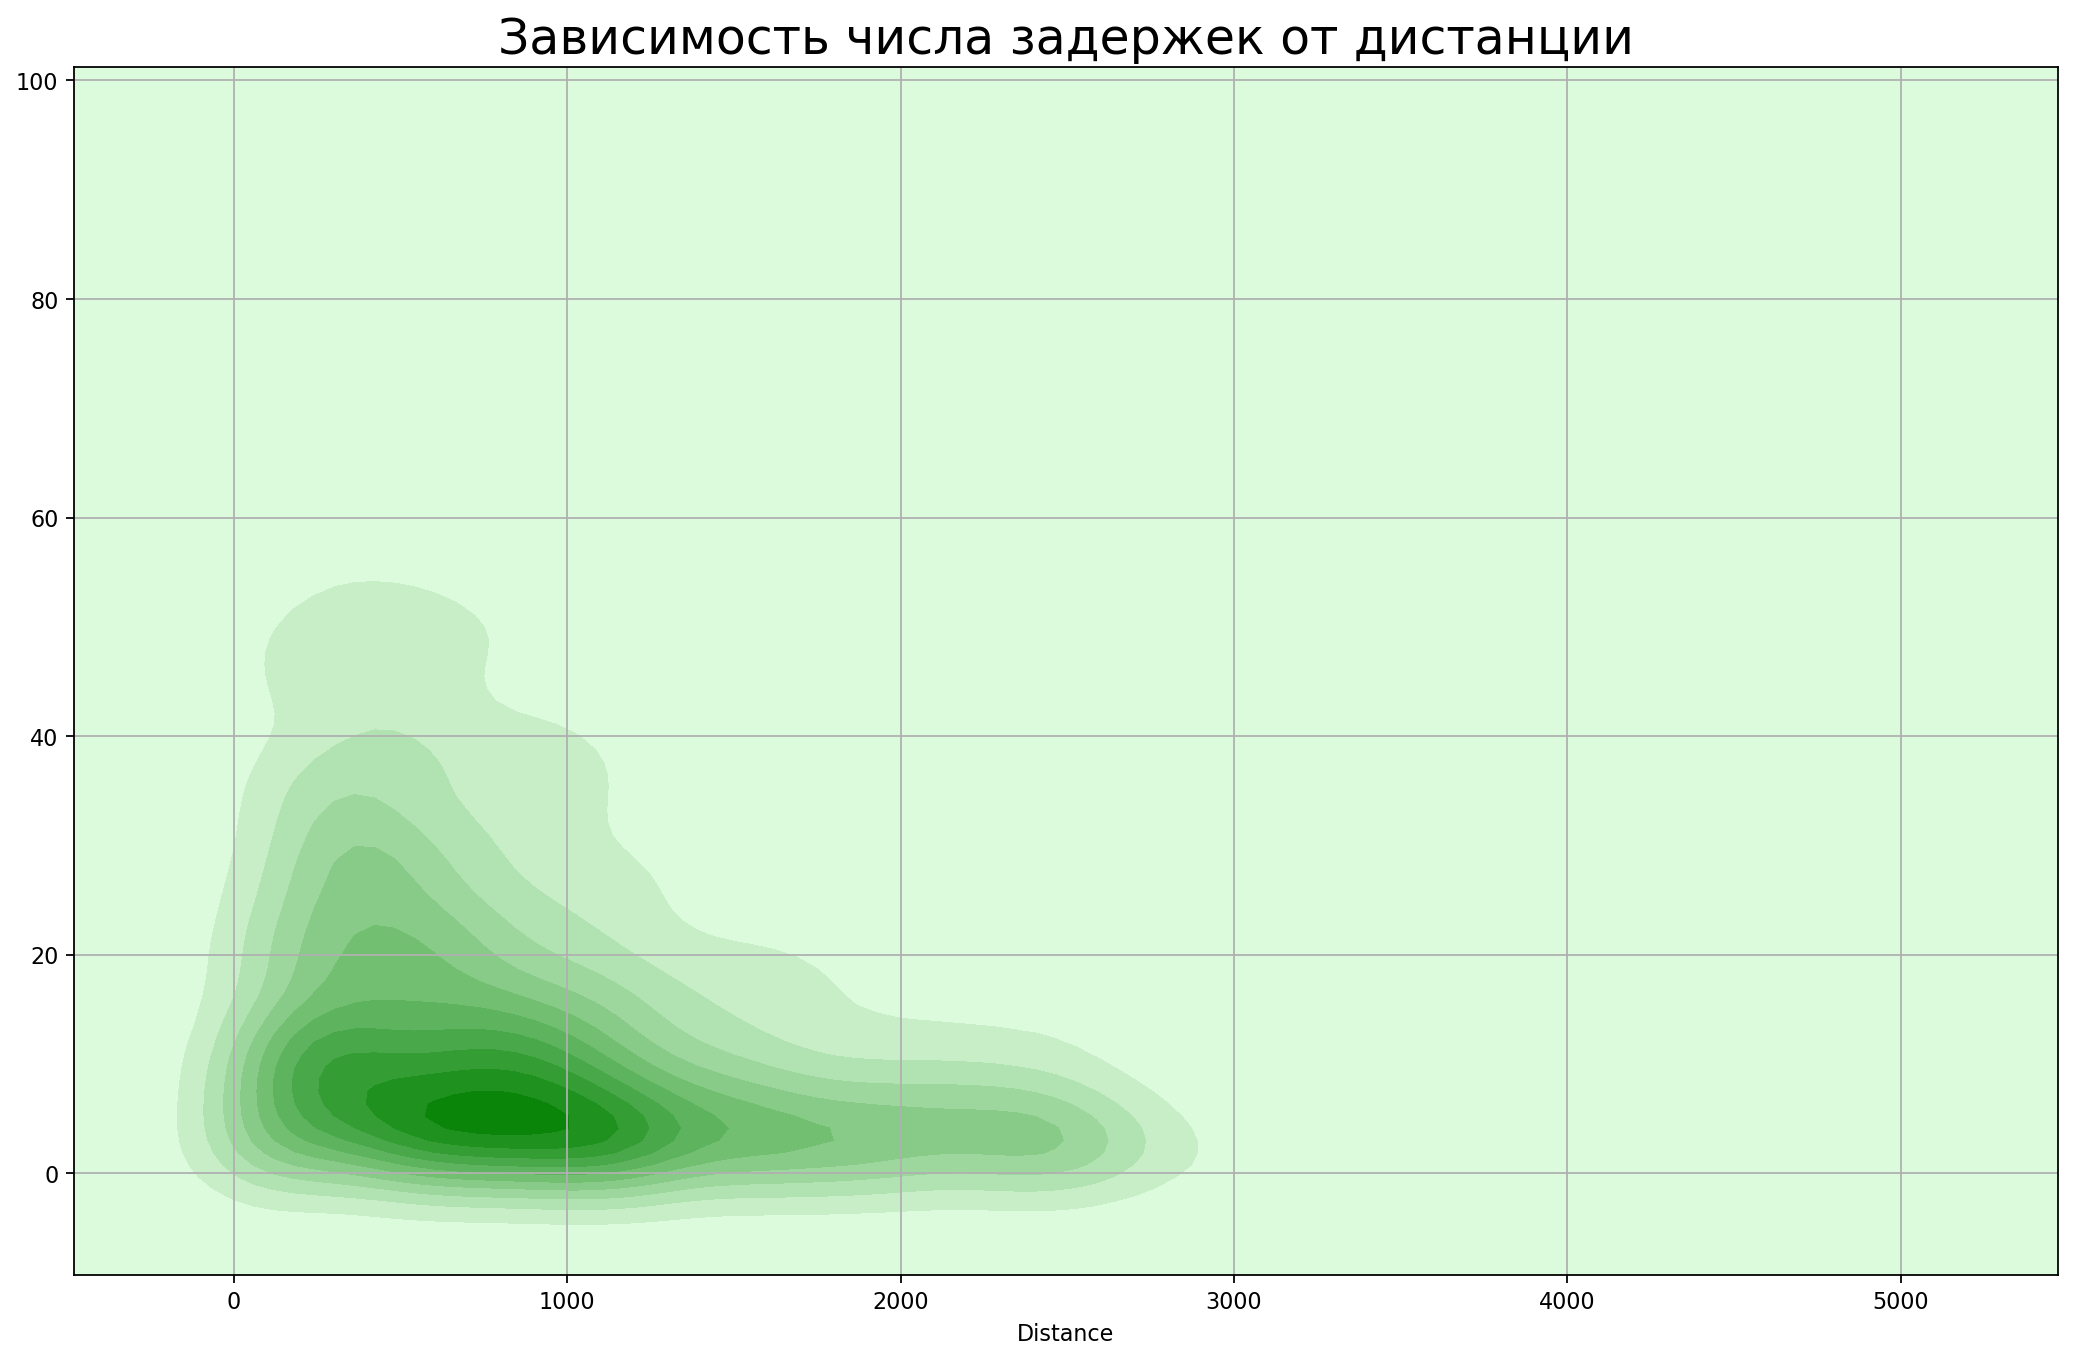

In [163]:
df =  pd.read_csv('flight_delays.csv')
df_Y = df[df['dep_delayed_15min'] == 'Y']
df_N = df[df['dep_delayed_15min'] == 'N']
disti_Y1 = df_Y.groupby('Distance').dep_delayed_15min.count()
distance = disti_Y1.sort_values()
'''fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.scatterplot(distance.keys(), distance.values, size=distance.values*2, ax=ax)
'''
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(distance.keys() ,distance.values, shade=True, color="g", alpha=1)
# Decorations
plt.title('Зависимость числа задержек от дистанции', fontsize=22)
plt.grid()
plt.show()

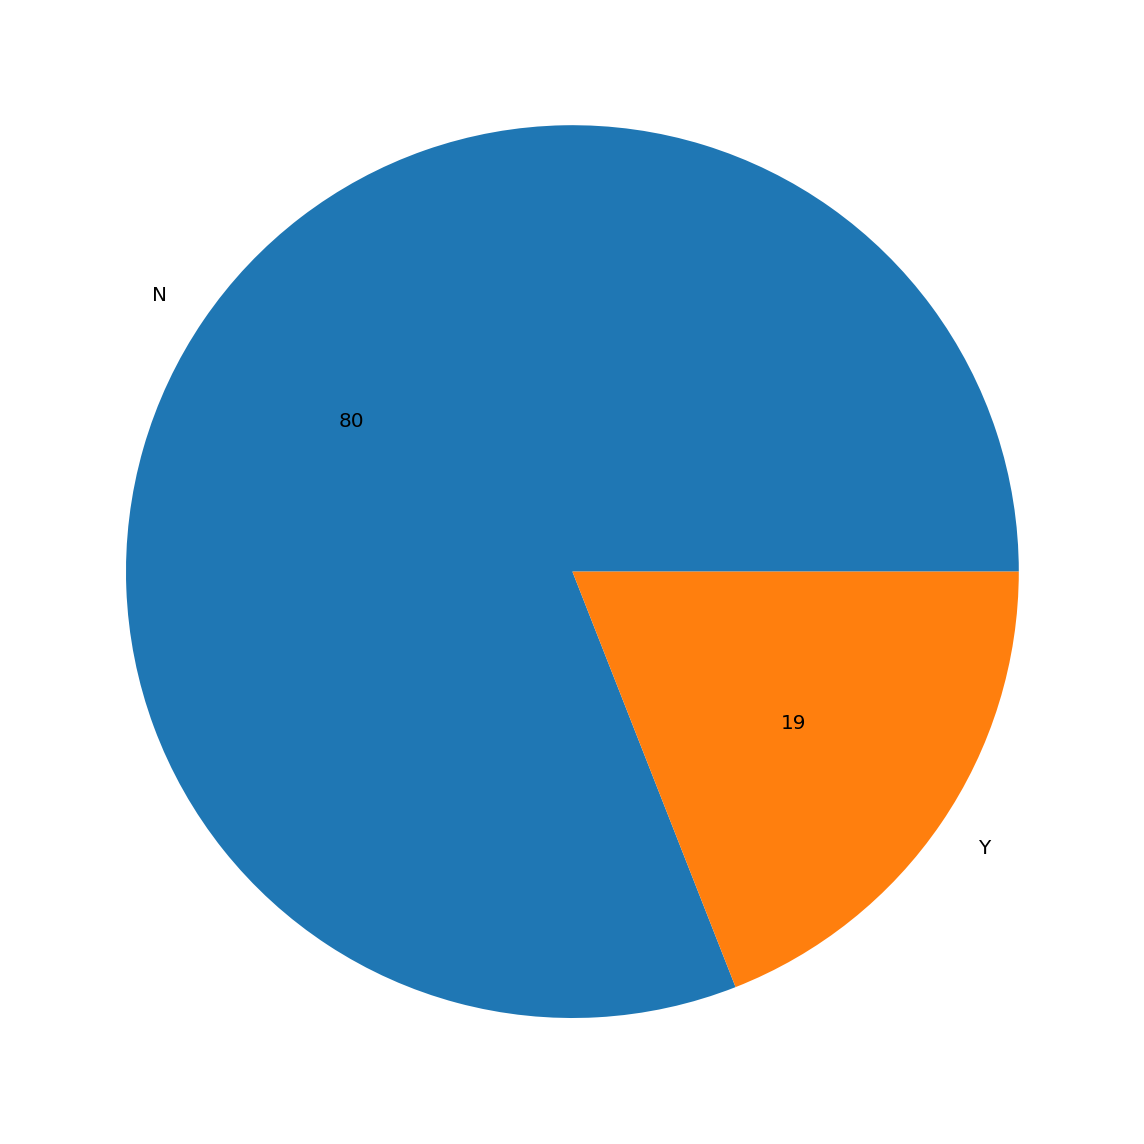

In [151]:

plt.figure(figsize = (10,15))
plt.pie(df.groupby('dep_delayed_15min')['Distance'].count(), labels = ['N', 'Y'], autopct = '%d')
plt.savefig('svagpie.svg', format = 'svg')
plt.show()

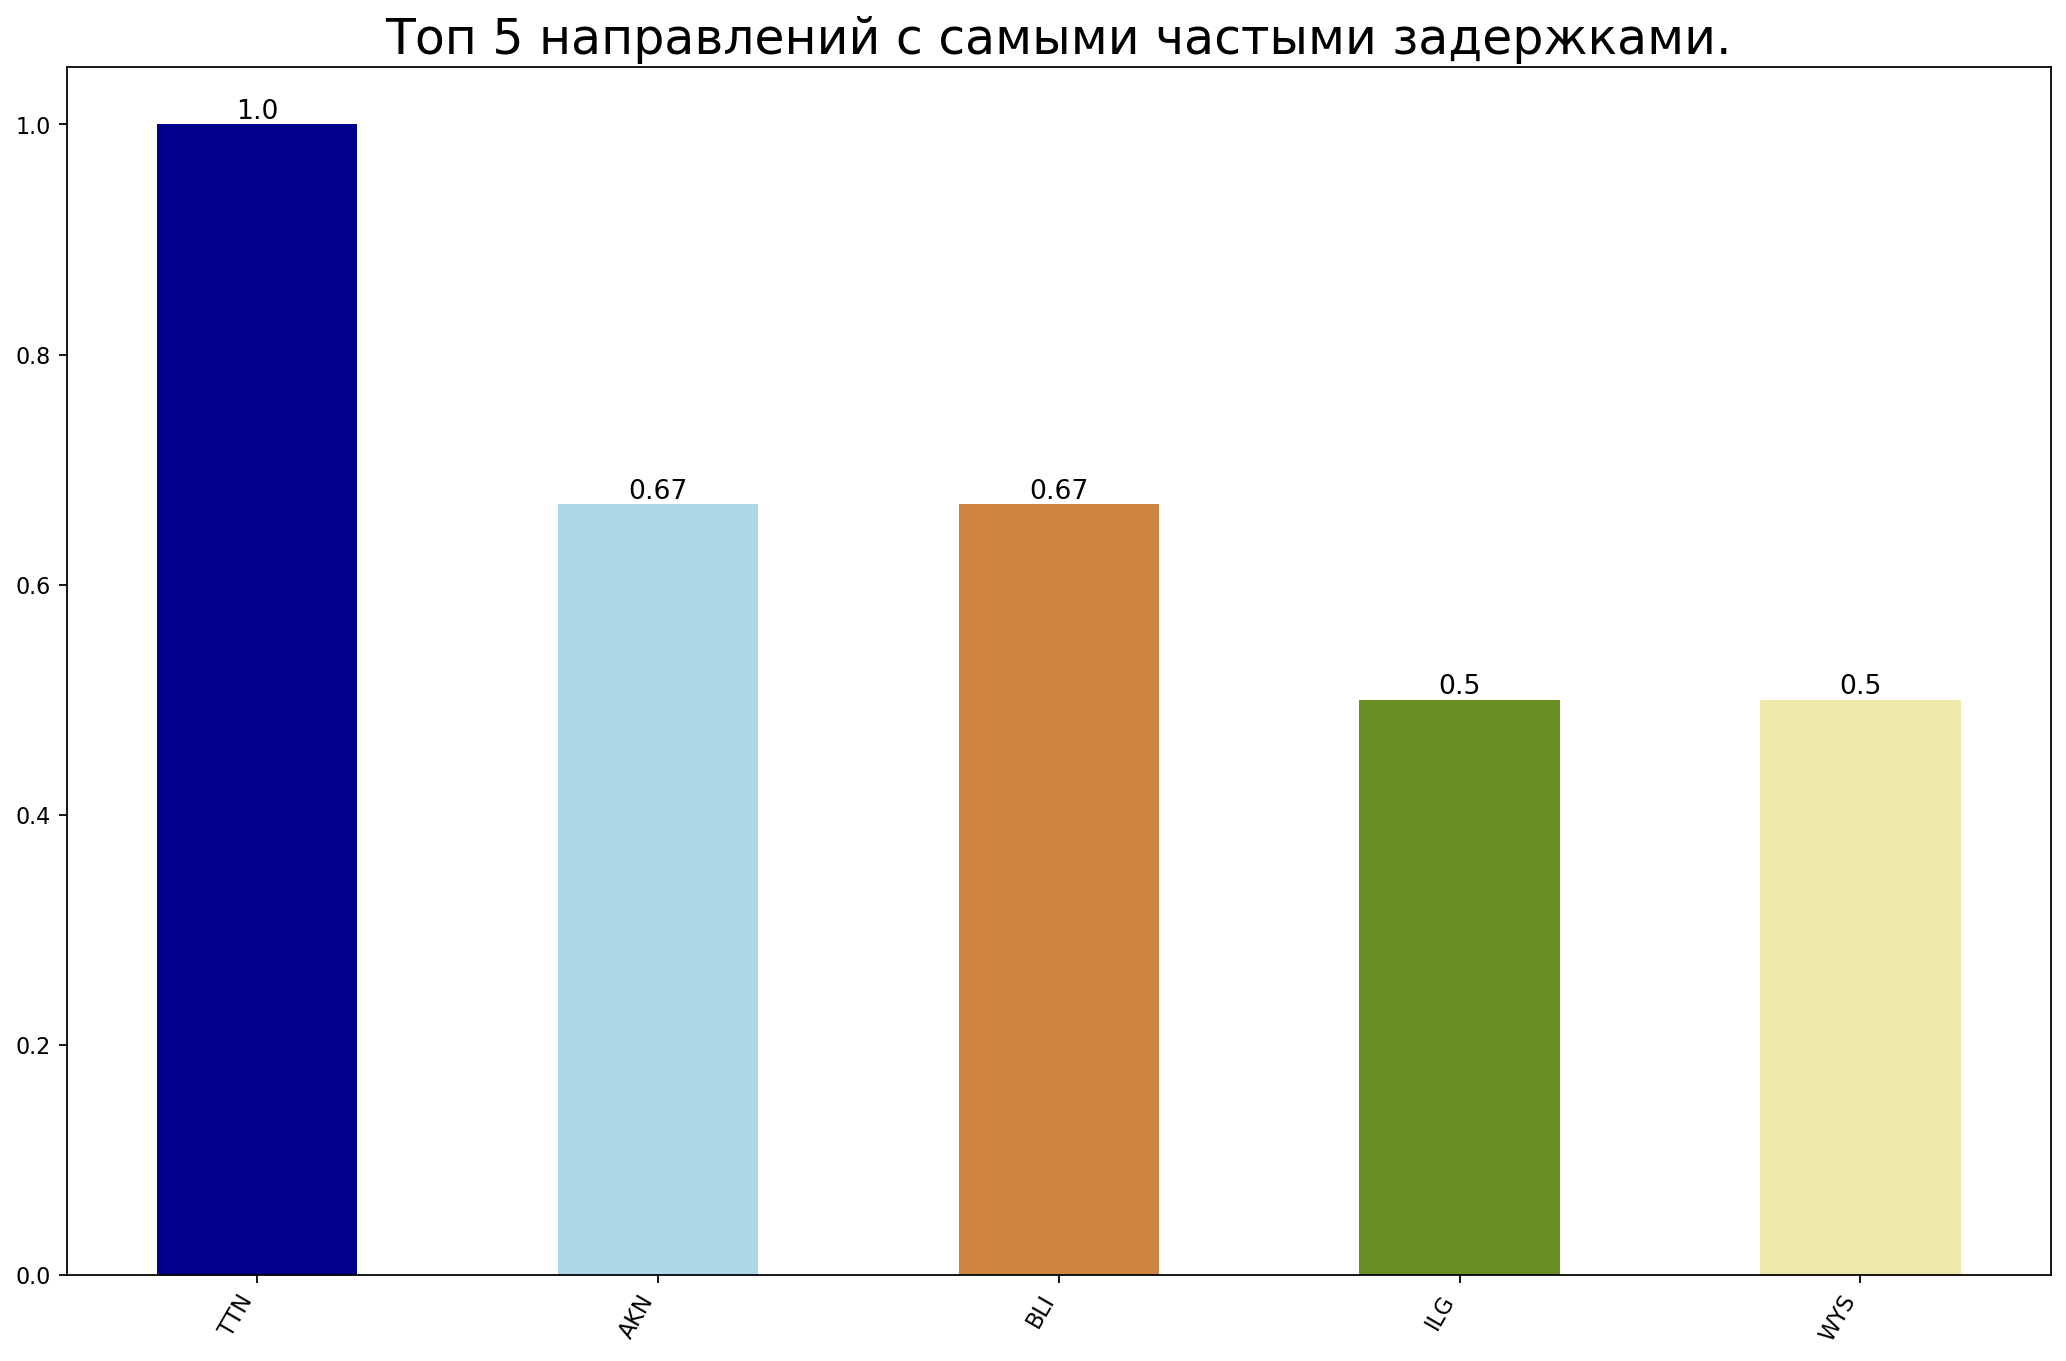

In [156]:
delay = df_Y.groupby('Dest').dep_delayed_15min.count()
total_del = df.groupby('Dest').dep_delayed_15min.count()
percent = delay/total_del
percent_v = percent.sort_values(ascending = False)[:5]
percent_v =  percent_v.round(decimals = 2)
n = len(percent_v.keys()) + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(percent_v.keys(), percent_v.values, color=c, width=.5)
for i, val in enumerate(percent_v):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(percent_v.keys() , rotation=60, horizontalalignment= 'right')
plt.title("Топ 5 направлений с самыми частыми задержками.", fontsize=22)

plt.show()

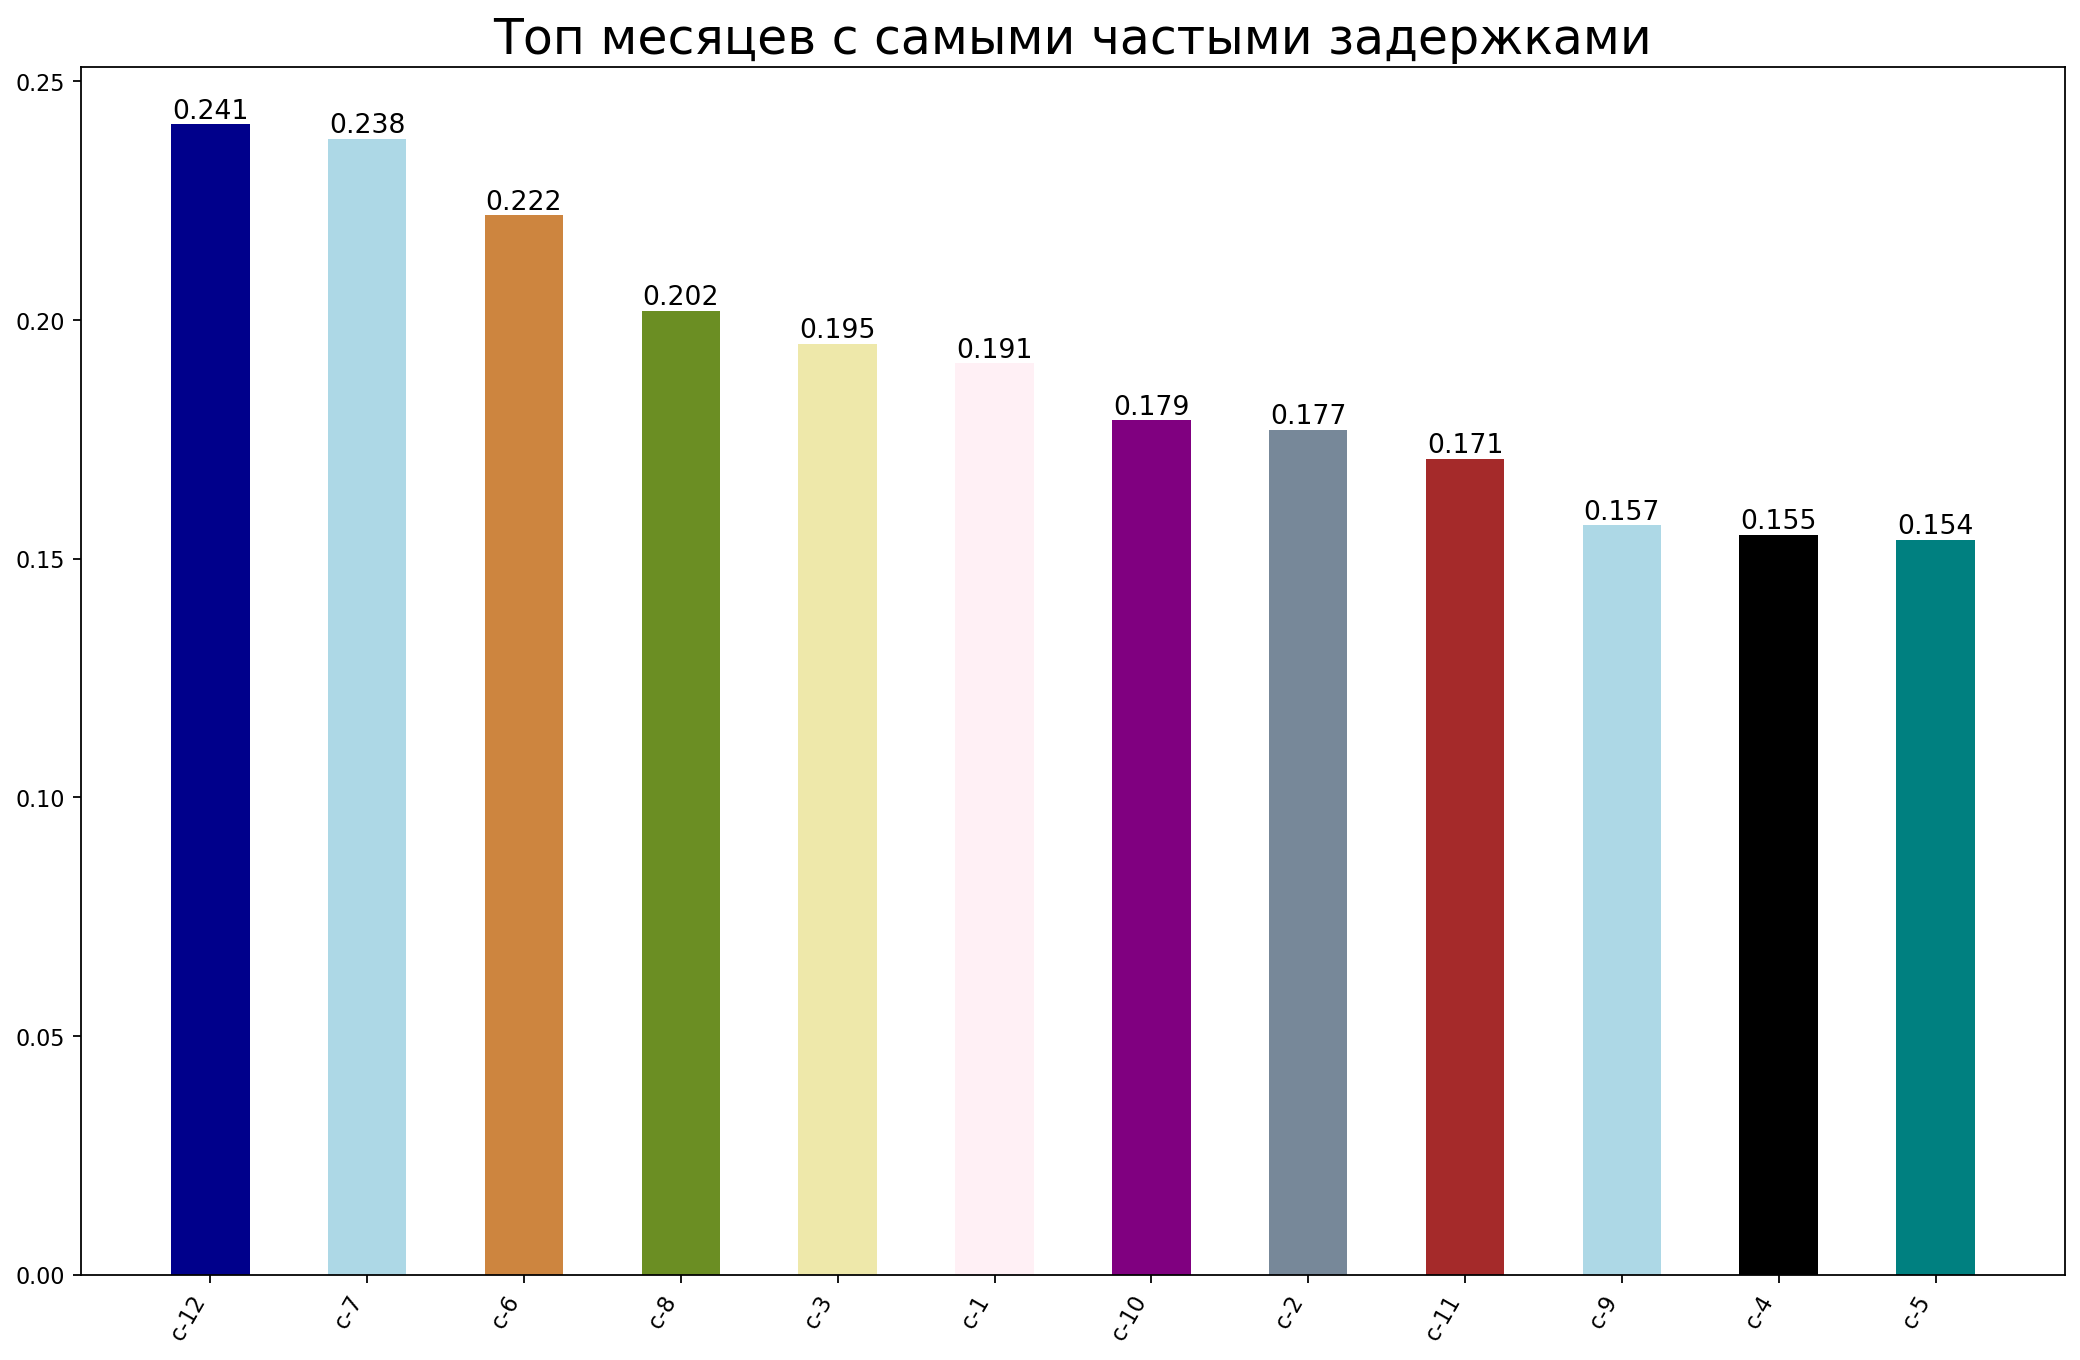

In [153]:
del_Y = df_Y.groupby('Month').dep_delayed_15min.count()
total_delM = df.groupby('Month').dep_delayed_15min.count()
seasons = del_Y/total_delM
seasper = seasons.sort_values(ascending = False)
seasper = seasper.round(decimals = 3)
n = len(seasper.keys()) + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(seasper.keys(), seasper.values, color=c, width=.5)
for i, val in enumerate(seasper):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(seasper.keys() , rotation=60, horizontalalignment= 'right')
plt.title("Топ месяцев с самыми частыми задержками", fontsize=22)

plt.show()

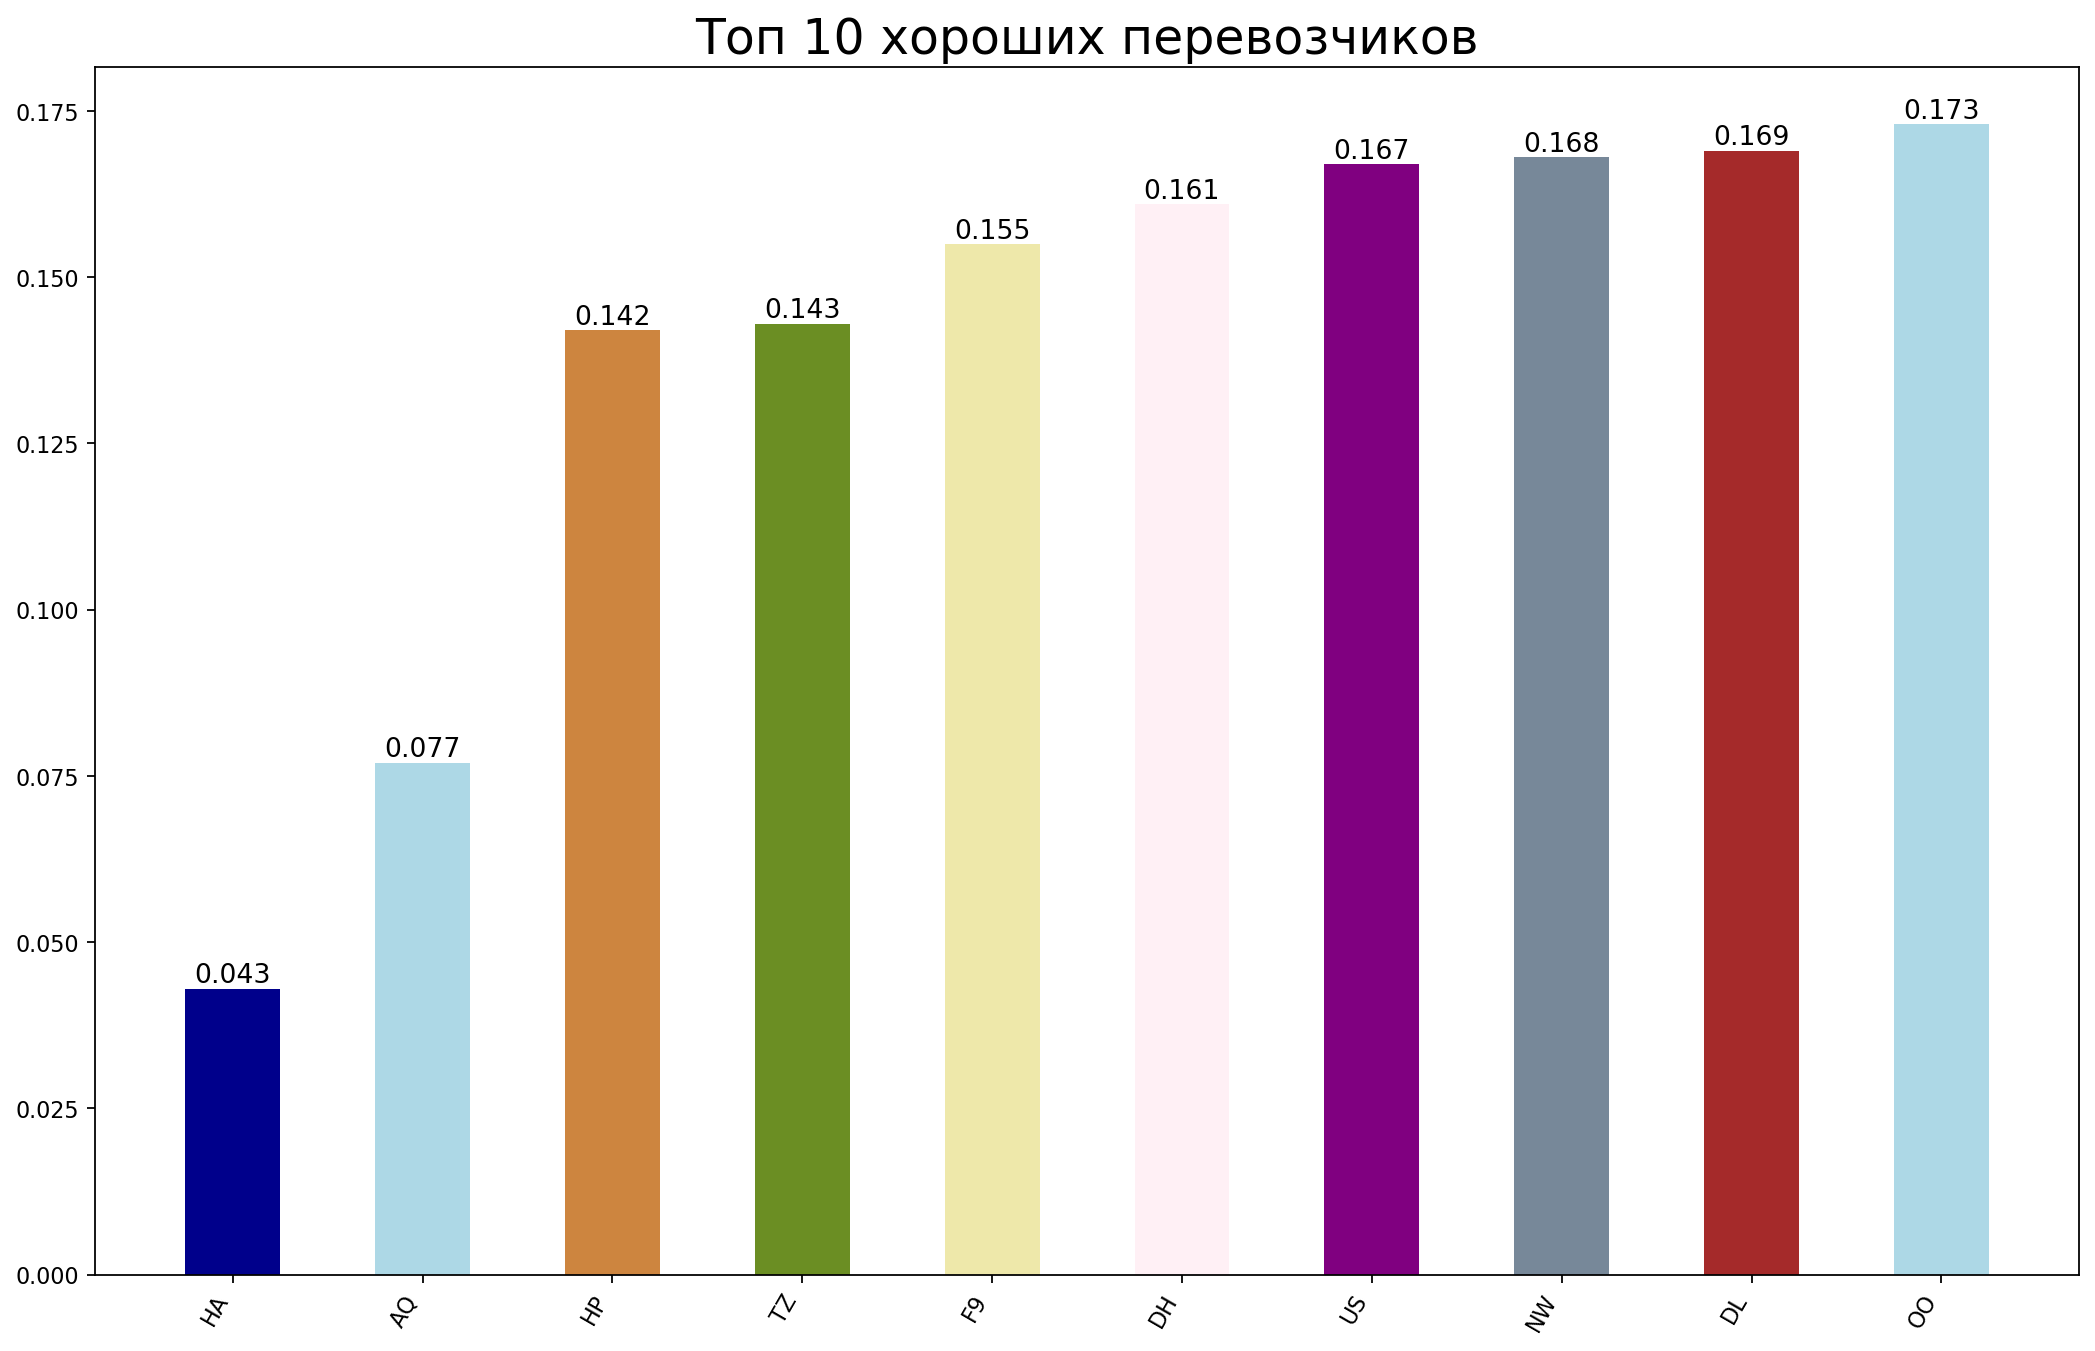

In [154]:
del_Y = df_Y.groupby('UniqueCarrier').dep_delayed_15min.count()
total_delM = df.groupby('UniqueCarrier').dep_delayed_15min.count()
carr = del_Y/total_delM
carrier = carr.sort_values(ascending = True)
carrier12 = carrier.round(decimals = 3)
carrier1 = carrier12[:10]
n = len(carrier1.keys()) + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(carrier1.keys(), carrier1.values, color=c, width=.5)
for i, val in enumerate(carrier1):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(carrier1.keys() , rotation=60, horizontalalignment= 'right')
plt.title("Топ 10 хороших перевозчиков", fontsize=22)

plt.show()

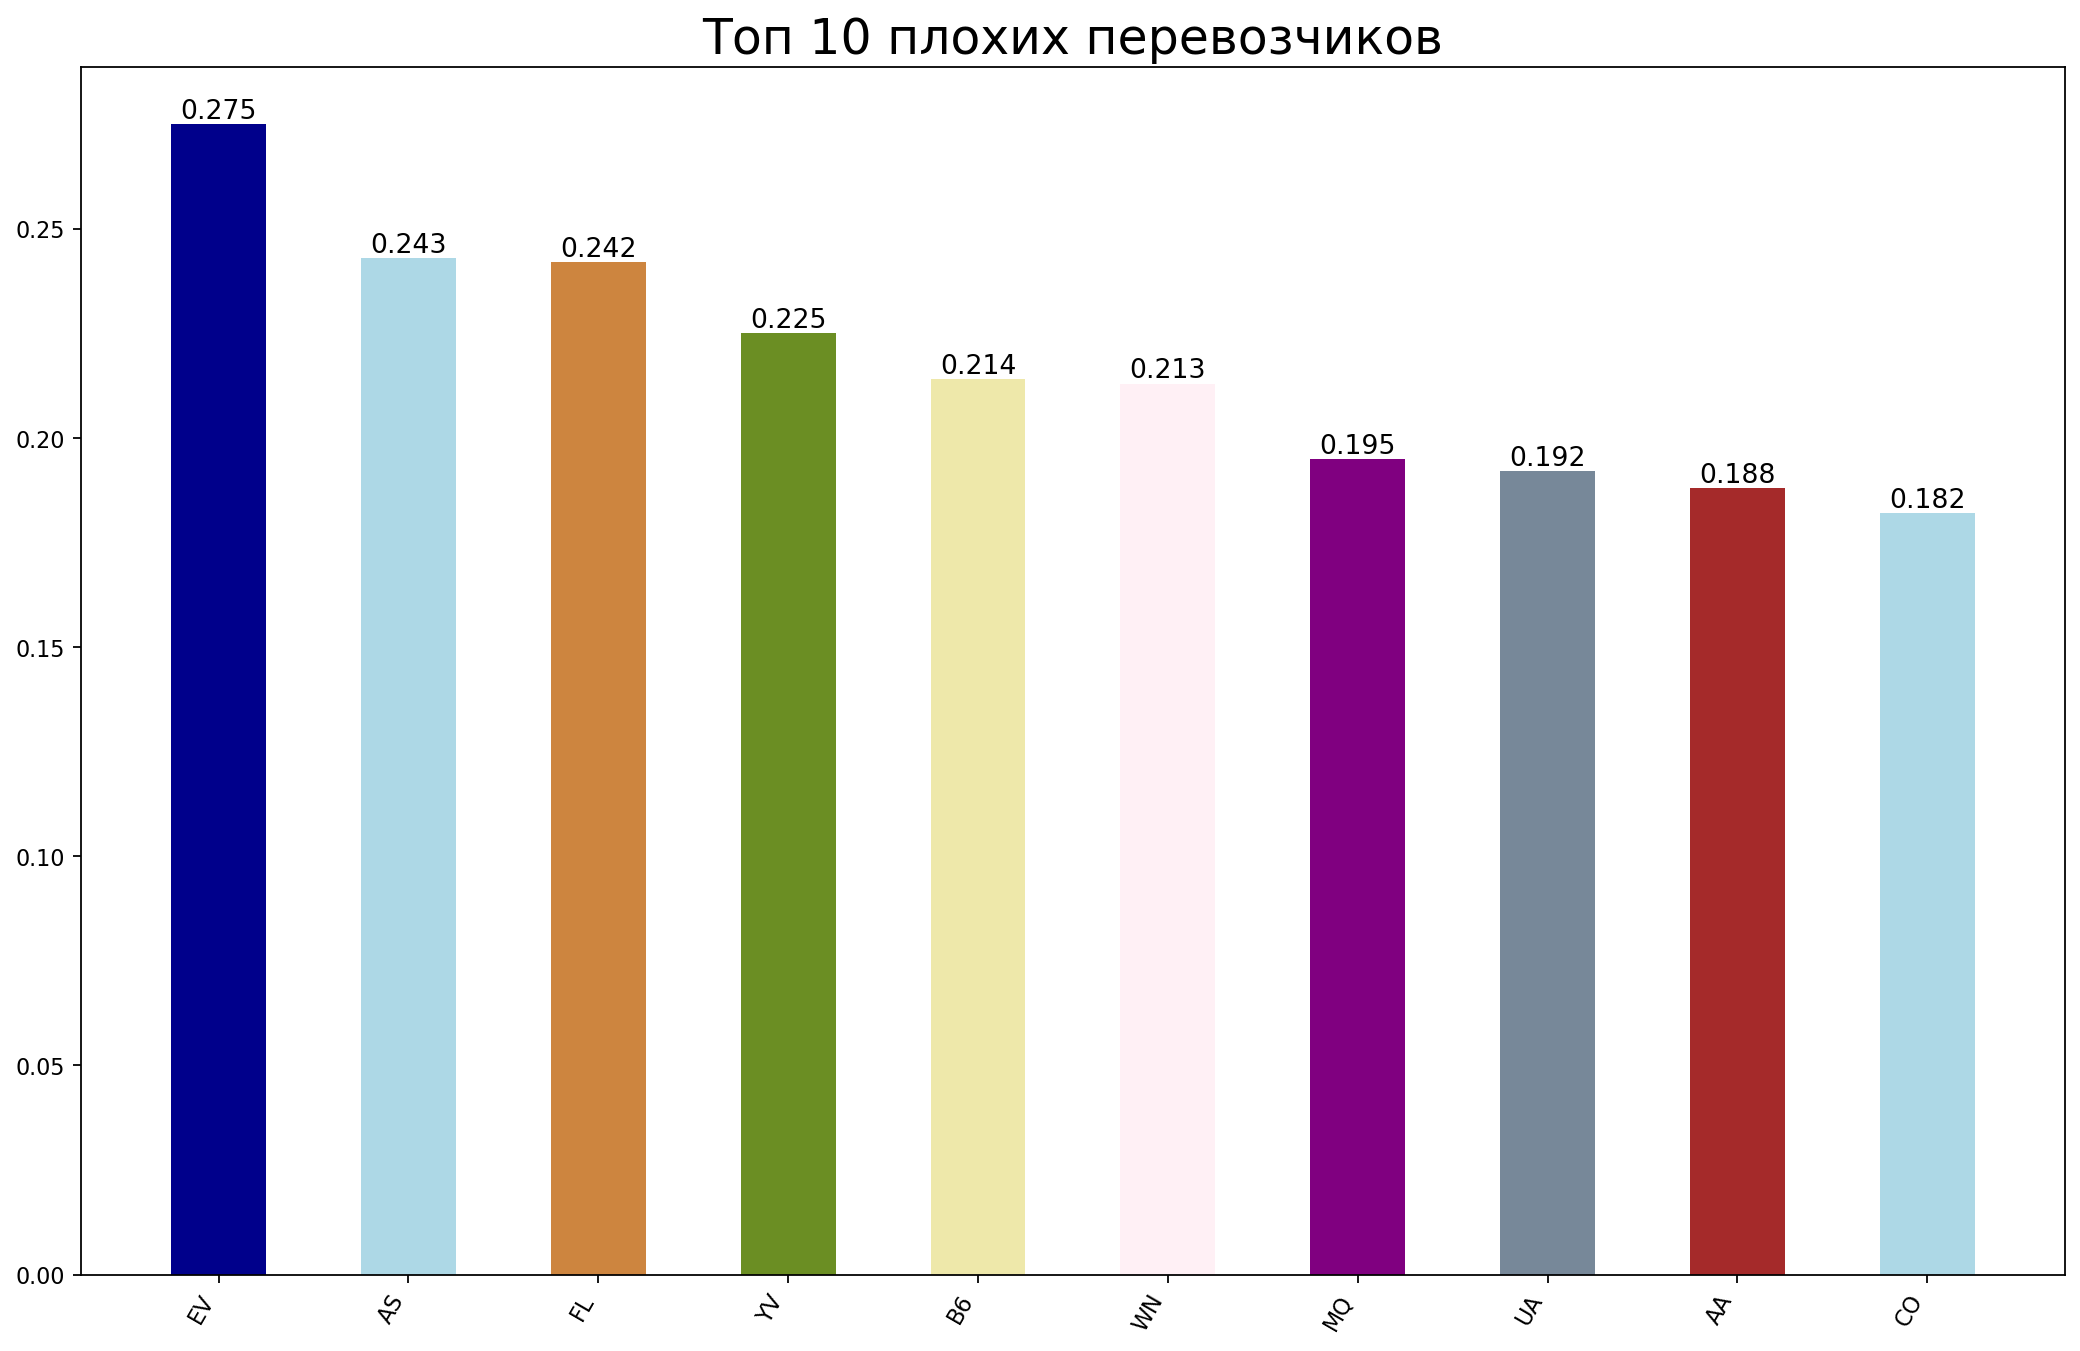

In [155]:
del_Y1 = df_Y.groupby('UniqueCarrier').dep_delayed_15min.count()
total_delM = df.groupby('UniqueCarrier').dep_delayed_15min.count()
carr_Y1 = del_Y1/total_delM
carrier_N = carr_Y1.sort_values(ascending = False)
carrier_n = carrier_N.round(decimals = 3)
carrier1 = carrier_n[:10]
n = len(carrier1.keys()) + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(carrier1.keys(), carrier1.values, color=c, width=.5)
for i, val in enumerate(carrier1):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(carrier1.keys() , rotation=60, horizontalalignment= 'right')
plt.title("Топ 10 плохих перевозчиков", fontsize=22)

plt.show()